## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 7*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


7. Sobre la imagen microscope.png, aplicar los siguientes pasos:
- Binarizar la imagen (si no está binarizada).
- Obtener la componente conexa de menor tamaño. ¿Cuántos píxeles tiene?
- Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria donde solo quede la mayor componente conexa.
- Aplicar operaciones morfológicas para contar cuántas hay células en total. ¿Comparar el número obtenido contra el número verdadero de células?

-------

#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### *Binarización de imagen*

En este caso, la imagen ya está binarizada (está en blanco y negro). Sin embargo, se utilizará un algoritmo de binarización para asegurarse que los pixeles sean negro o blanco. 

In [2]:
# Importar imagen en escala de grises
img = cv2.imread('img/microscope.png', cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen con Otsu
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

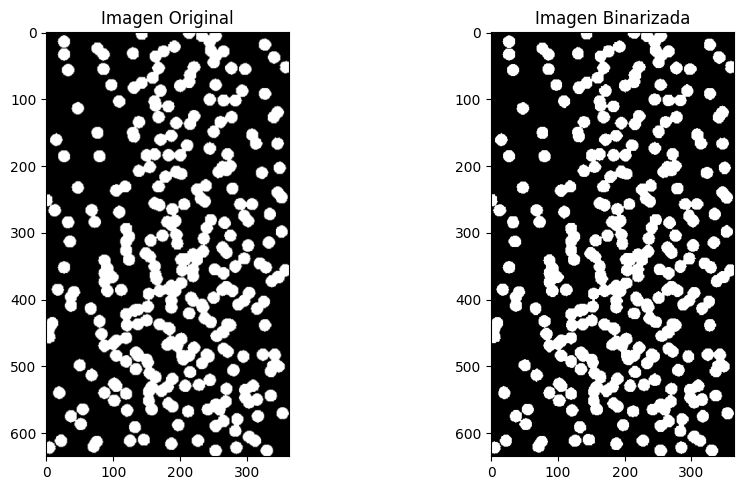

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(img_bin, cmap='gray')
plt.title('Imagen Binarizada')

plt.tight_layout()

plt.show()

#### *Componente Conexo (de menor tamaño)*

Posteriormente, se obtuvo el componente conexo de menor tamaño. Como se puede observar, tiene un tamaño de xx pixeles. 

In [10]:
# Identificación de componentes conexos
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_bin, connectivity=8)

In [12]:
# Encontrar el componente conexo de menor tamaño (excluyendo el fondo)
min_component_index = np.argmin(stats[1:, cv2.CC_STAT_AREA]) + 1

# Extrae la máscara del componente conexo más pequeño
min_component_mask = (labels == min_component_index).astype(np.uint8) * 255

# Calcula el área del componente conexo más pequeño
min_component_area = stats[min_component_index, cv2.CC_STAT_AREA]

# Muestra la imagen del componente conexo más pequeño
cv2.imshow('Componente Conexo Más Pequeño', min_component_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Indica cuántos pixeles blancos tiene el componente conexo más pequeño
print(f"El componente conexo más pequeño tiene {min_component_area} píxeles blancos.")


El componente conexo más pequeño tiene 158 píxeles blancos.


: 

#### *Componente Conexo (de mayor tamaño)*

Luego, se obtuvo el componente conexo de mayor tamaño y se removió el resto de componentes.